In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Decks_Dataset.csv")
df.head()

,carta_1,carta_2,carta_3,carta_4,carta_5,carta_6,carta_7,carta_8,rating,usage,wins,draws,losses,avg.elixir,game_mode
0,Mortar/Evolution,Royal_Guards/Evolution,Skeleton_Barrel,Dark_Prince,Mother_Witch,Arrows,The_Log,Rocket,82,88761,65.90%,6,34.10%,4.0,normal_battle
1,Furnace/Evolution,Knight/Evolution,Graveyard,Poison,Ice_Wizard,Goblin_Hut,Skeletons,Barbarian_Barrel,65,70794,56.50%,4,43.50%,3.3,normal_battle
2,Goblin_Giant/Evolution,PEKKA/Evolution,Goblin_Machine,Electro_Wizard,Goblin_Curse,Bomber,Arrows,Rage,63,213251,55.70%,20,44.30%,3.9,normal_battle
3,Goblin_Cage/Evolution,Royal_Guards/Evolution,Royal_Hogs,Flying_Machine,Fireball,Zappies,Arrows,Barbarian_Barrel,62,80210,55.20%,24,44.80%,4.1,normal_battle
4,Skeleton_Barrel/Evolution,Mortar/Evolution,Skeleton_King,Cannon_Cart,Goblin_Gang,Ice_Wizard,Arrows,Spear_Goblins,61,218736,54.80%,259,45.10%,3.4,normal_battle


In [4]:
df["wins"] = df["wins"].str.replace("%", "").astype(float)
df["losses"] = df["losses"].str.replace("%", "").astype(float)

In [5]:
df["wins"] /= 100
df["losses"] /= 100

## PRIMERA GRAFICA  

C:\Users\agabr\AppData\Local\Temp\ipykernel_30120\1606460300.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(card_stats.index, rotation=45, ha="right")


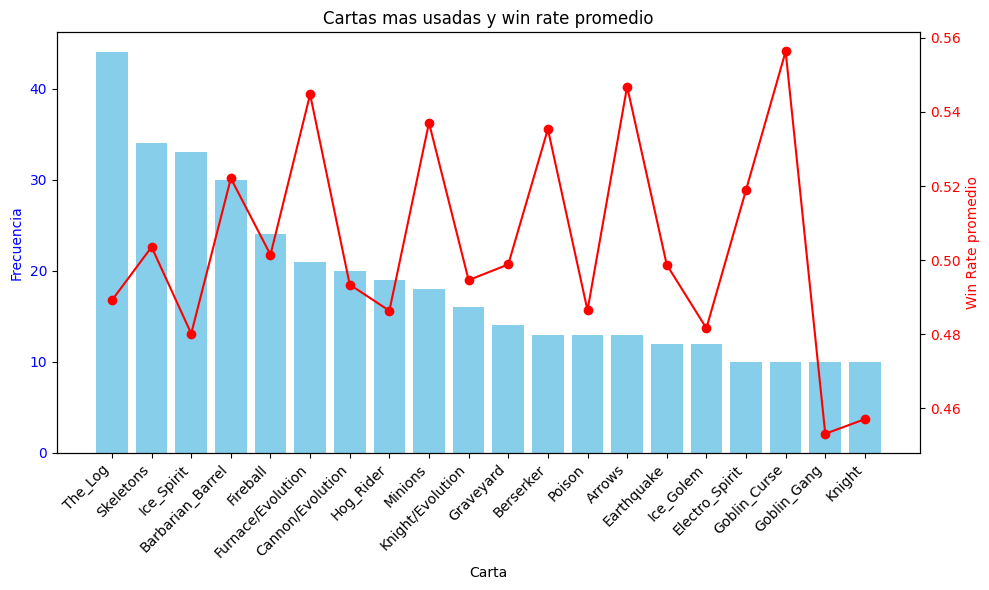

In [ ]:
all_cards = pd.concat([df[f"carta_{i}"] for i in range(1, 9)], axis=0)

card_counts = all_cards.value_counts().head(20)

win_rates = {}
for card in card_counts.index:
    mask = (df[[f"carta_{i}" for i in range(1, 9)]] == card).any(axis=1)
    win_rates[card] = df.loc[mask, "win_rate"].mean()

card_stats = pd.DataFrame({
    "Frecuencia": card_counts.values,
    "Win Rate": [win_rates[card] for card in card_counts.index]
}, index=card_counts.index)

# Plot combinado
fig, ax1 = plt.subplots(figsize=(10,6))

#Frecuencia (barras)
ax1.bar(card_stats.index, card_stats["Frecuencia"], color="skyblue")
ax1.set_xlabel("Carta")
ax1.set_ylabel("Frecuencia", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(card_stats.index, rotation=45, ha="right")

#Win Rate (línea)
ax2 = ax1.twinx()
ax2.plot(card_stats.index, card_stats["Win Rate"], color="red", marker="o")
ax2.set_ylabel("Win Rate promedio", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Cartas mas usadas y win rate promedio")
plt.tight_layout()
plt.show()


## SEGUNDA GRAFICA

C:\Users\agabr\AppData\Local\Temp\ipykernel_12076\2797693241.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="deck_id", data=deck_counts_low, palette="cool")


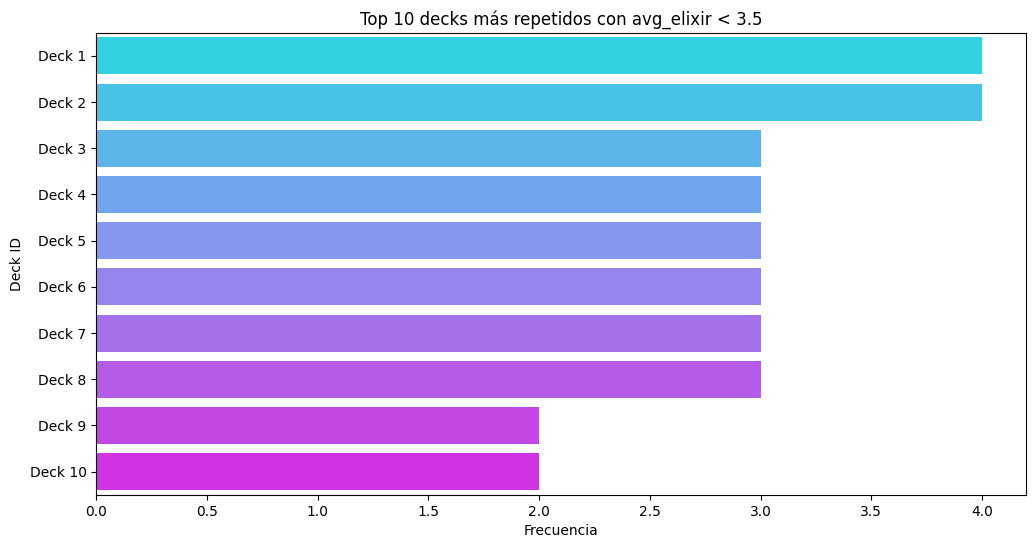

Decks:
Deck 1: ('Cannon/Evolution', 'Earthquake', 'Firecracker/Evolution', 'Hog_Rider', 'Ice_Spirit', 'Mighty_Miner', 'Skeletons', 'The_Log')
Deck 2: ('Barbarian_Barrel', 'Berserker', 'Furnace/Evolution', 'Goblin_Hut', 'Graveyard', 'Ice_Spirit', 'Knight/Evolution', 'Poison')
Deck 3: ('Archers/Evolution', 'Electro_Spirit', 'Fireball', 'Knight', 'Skeletons', 'Tesla/Evolution', 'The_Log', 'X-bow')
Deck 4: ('Barbarian_Barrel', 'Furnace/Evolution', 'Goblin_Hut', 'Graveyard', 'Ice_Wizard', 'Knight/Evolution', 'Poison', 'Skeletons')
Deck 5: ('Archer_Queen', 'Cannon/Evolution', 'Earthquake', 'Ice_Spirit/Evolution', 'Royal_Delivery', 'Royal_Hogs', 'Skeletons', 'The_Log')
Deck 6: ('Goblin_Barrel/Evolution', 'Goblin_Gang', 'Ice_Spirit', 'Inferno_Tower', 'Knight/Evolution', 'Princess', 'Rocket', 'The_Log')
Deck 7: ('Cannon/Evolution', 'Fireball', 'Hog_Rider', 'Ice_Golem', 'Ice_Spirit', 'Musketeer', 'Skeletons/Evolution', 'The_Log')
Deck 8: ('Ballon', 'Barbarian_Barrel', 'Bomb_Tower', 'Giant_Snowba

In [ ]:
df["deck"] = df[[f"carta_{i}" for i in range(1,9)]].apply(lambda x: tuple(sorted(x)), axis=1)
df_low_elixir = df[df["avg.elixir"] < 3.5]

#DF
deck_counts_low = df_low_elixir["deck"].value_counts().head(10).reset_index()
deck_counts_low.columns = ["deck", "count"]  # renombrar columnas

deck_mapping = {deck: f"Deck {i+1}" for i, deck in enumerate(deck_counts_low["deck"].unique())}

deck_counts_low["deck_id"] = deck_counts_low["deck"].map(deck_mapping)

plt.figure(figsize=(12,6))
sns.barplot(x="count", y="deck_id", data=deck_counts_low, palette="cool")
plt.title("Top 10 decks más repetidos con avg_elixir < 3.5")
plt.xlabel("Frecuencia")
plt.ylabel("Deck ID")
plt.show()

print("Decks:")
for deck, deck_id in deck_mapping.items():
    print(f"{deck_id}: {deck}")


### TERCERA GRAFICA


In [ ]:
df["win_rate"] = df["wins"] / (df["wins"] + df["losses"])
df["deck"] = df[[f"carta_{i}" for i in range(1,9)]].apply(lambda x: tuple(sorted(x)), axis=1)

best_decks_by_mode = (df.groupby(["deck", "game_mode"])["win_rate"].mean().reset_index())

top10_by_mode = (best_decks_by_mode.sort_values(["game_mode", "win_rate"], ascending=[True, False]).groupby("game_mode").head(4))

top10_by_mode["deck"] = top10_by_mode["deck"].astype(str)


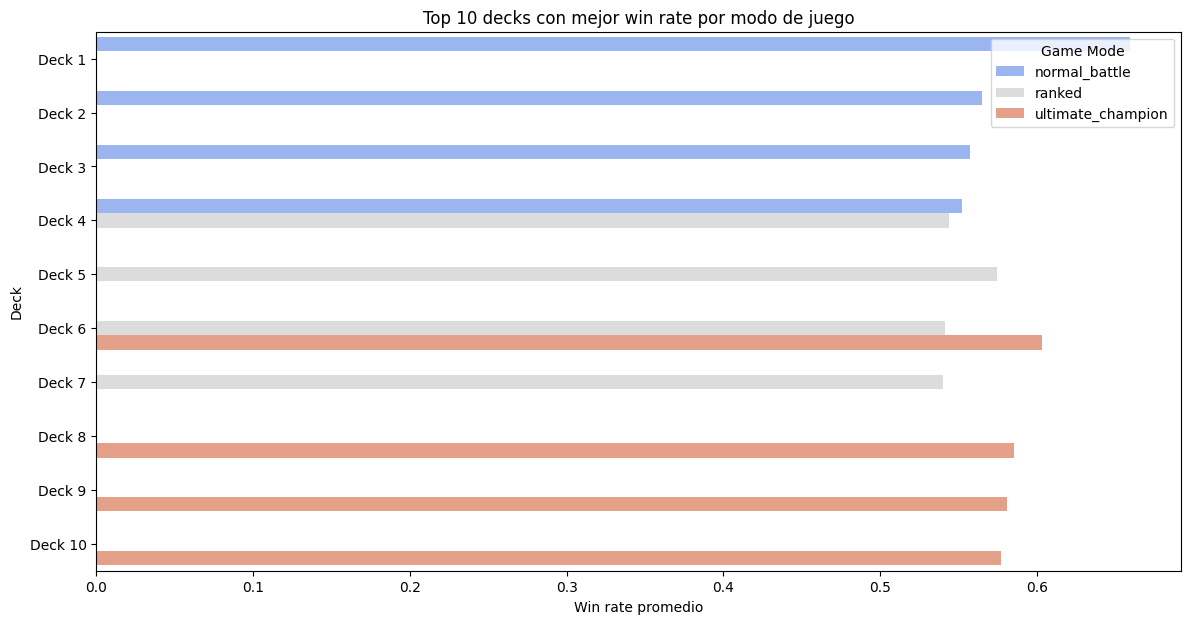

Decks:
Deck 1: ('Arrows', 'Dark_Prince', 'Mortar/Evolution', 'Mother_Witch', 'Rocket', 'Royal_Guards/Evolution', 'Skeleton_Barrel', 'The_Log')
Deck 2: ('Barbarian_Barrel', 'Furnace/Evolution', 'Goblin_Hut', 'Graveyard', 'Ice_Wizard', 'Knight/Evolution', 'Poison', 'Skeletons')
Deck 3: ('Arrows', 'Bomber', 'Electro_Wizard', 'Goblin_Curse', 'Goblin_Giant/Evolution', 'Goblin_Machine', 'PEKKA/Evolution', 'Rage')
Deck 4: ('Arrows', 'Barbarian_Barrel', 'Fireball', 'Flying_Machine', 'Goblin_Cage/Evolution', 'Royal_Guards/Evolution', 'Royal_Hogs', 'Zappies')
Deck 5: ('Barbarian_Barrel', 'Furnace/Evolution', 'Giant_Skeleton', 'Goblin_Curse', 'Goblin_Giant/Evolution', 'Goblin_Machine', 'Minions', 'rage')
Deck 6: ('Barbarian_Barrel', 'Furnace/Evolution', 'Goblin_Curse', 'Goblin_Giant/Evolution', 'Goblin_Machine', 'Minions', 'Rage', 'Spirit_Empress')
Deck 7: ('Berserker', 'Furnace/Evolution', 'Giant_Skeleton', 'Giant_Snowball/Evolution', 'Goblin_Curse', 'Goblin_Hut', 'Graveyard', 'Minions')
Deck 8:

In [ ]:
top10_copy = top10_by_mode.copy()
deck_mapping = {deck: f"Deck {i+1}" for i, deck in enumerate(top10_copy["deck"].unique())}
top10_copy["deck_id"] = top10_copy["deck"].map(deck_mapping)

plt.figure(figsize=(14, 7))
sns.barplot(data=top10_copy, x="win_rate", y="deck_id", hue="game_mode", palette="coolwarm")

plt.title("Top 10 decks con mejor win rate por modo de juego")
plt.xlabel("Win rate promedio")
plt.ylabel("Deck")
plt.legend(title="Game Mode")
plt.show()


print("Decks:")
for deck, deck_id in deck_mapping.items():
    print(f"{deck_id}: {deck}")


## CUARTA GRAFICA

C:\Users\agabr\AppData\Local\Temp\ipykernel_30120\4031927739.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cards_mode = mode_card_counts.groupby("game_mode").apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)


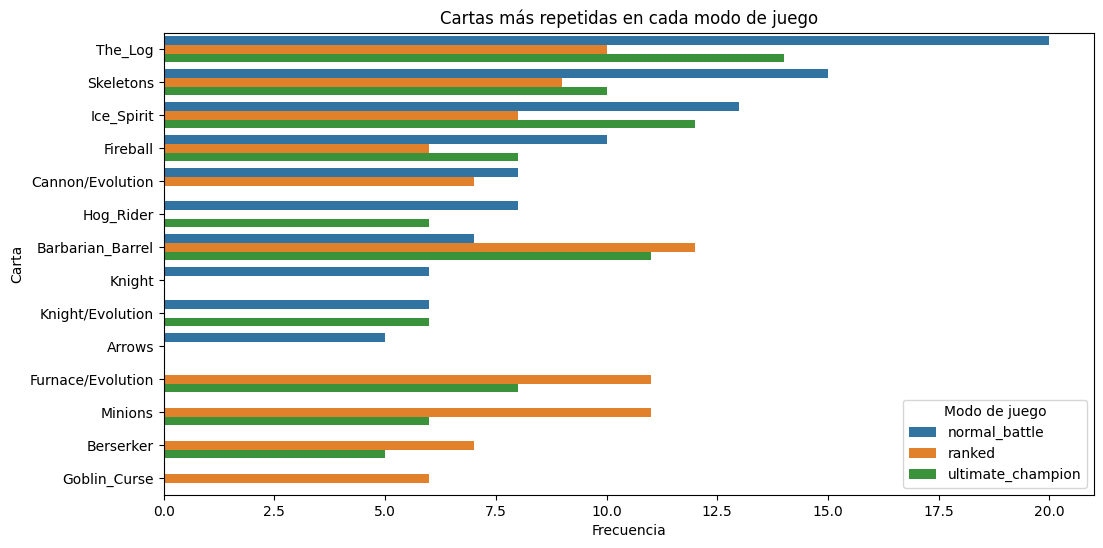

In [15]:
# Transformar a formato largo (long format)
cards_long = pd.melt(df, id_vars=["game_mode"], value_vars=[f"carta_{i}" for i in range(1,9)], var_name="slot", value_name="carta")

# Contar ocurrencias por modo
mode_card_counts = cards_long.groupby(["game_mode", "carta"]).size().reset_index(name="count")

# Top 10 por cada modo
top_cards_mode = mode_card_counts.groupby("game_mode").apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.barplot(data=top_cards_mode, x="count", y="carta", hue="game_mode", dodge=True)
plt.title("Cartas más repetidas en cada modo de juego")
plt.xlabel("Frecuencia")
plt.ylabel("Carta")
plt.legend(title="Modo de juego")
plt.show()


## QUINTA GRAFICA

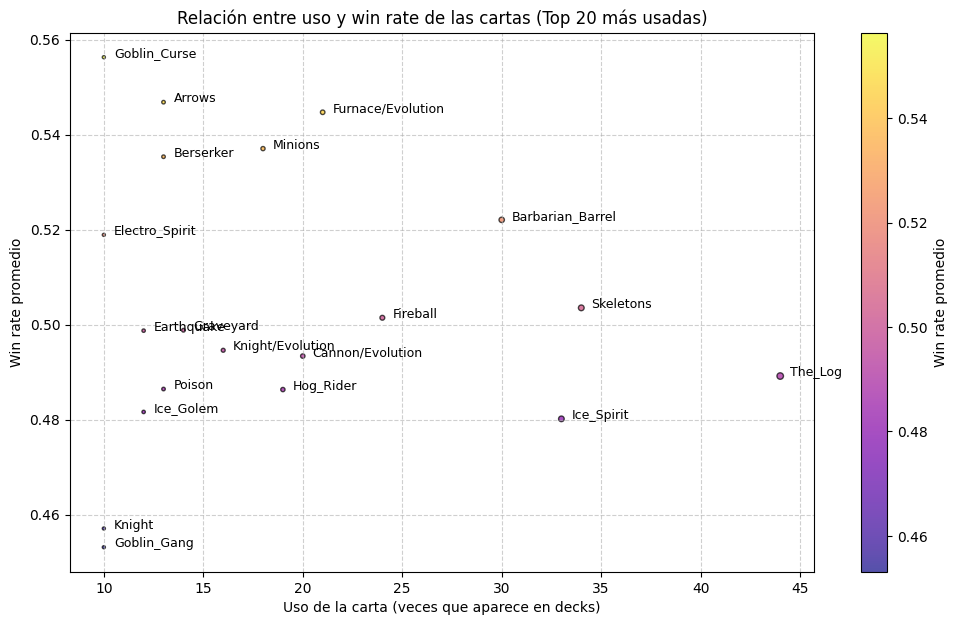

In [26]:
# Relacionar cartas con win_rate
cards_wr = df.melt(id_vars=["win_rate"], value_vars=[f"carta_{i}" for i in range(1,9)], var_name="slot", value_name="carta")

# Calcular win_rate promedio y uso de cada carta
cards_stats = cards_wr.groupby("carta").agg(win_rate_mean=("win_rate", "mean"),usage=("carta", "count")).reset_index()

# Ordenar y quedarnos con el top 20 (más representativas)
cards_stats = cards_stats.sort_values("usage", ascending=False).head(20)

plt.figure(figsize=(12,7))
scatter = plt.scatter(cards_stats["usage"], cards_stats["win_rate_mean"], s=cards_stats["usage"]*0.5,   c=cards_stats["win_rate_mean"], cmap="plasma", alpha=0.7, edgecolors="k")

#Etiquetar cada carta
for i, row in cards_stats.iterrows():
    plt.text(row["usage"]+0.5, row["win_rate_mean"], row["carta"], fontsize=9)

plt.colorbar(scatter, label="Win rate promedio")
plt.title("Relación entre uso y win rate de las cartas (Top 20 más usadas)")
plt.xlabel("Uso de la carta (veces que aparece en decks)")
plt.ylabel("Win rate promedio")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
